 **Riddhi Tanna**
 (**201801427**)

In [255]:
# importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [184]:
df = pd.read_csv('/Users/riddhi/Downloads/Temperature_2020.csv')  #reading the dataset, insert path accordingly

In [185]:
station = input('Enter the name of the station for which you want the histograms:') #station for plotting

Enter the name of the station for which you want the histograms:KUITPO FOREST RESERVE AS


In [219]:
df_c = df.copy()
df_copy = df_c.loc[df['STATION_NAME'] == station] #filtering the dataset to get values for just the required station
df_copy.index = np.arange(0,len(df_copy))

#Removing invalid temperature value(s) - here, -9999

for i in df_copy.index:
    if(df_copy['TMAX'][i] ==-9999):
        df['TMAX'][i] = 0
for i in df_copy.index:
    if(df_copy['TMIN'][i] ==-9999):
        
        df_copy['TMIN'][i] = 0
index_df = np.arange(0,427)
df_copy.index = index_df
df_copy.describe()

,DATE,TMAX,TMIN
count,4.270000e+02,427.000000,427.000000
mean,2.014205e+07,207.037471,112.611241
std,3.366451e+03,72.522417,43.459751
min,2.014010e+07,0.000000,13.000000
25%,2.014042e+07,150.000000,85.000000
50%,2.014080e+07,197.000000,107.000000
75%,2.014112e+07,248.500000,134.000000
max,2.015030e+07,414.000000,277.000000


# Cumulative Distribution Function for TMAX

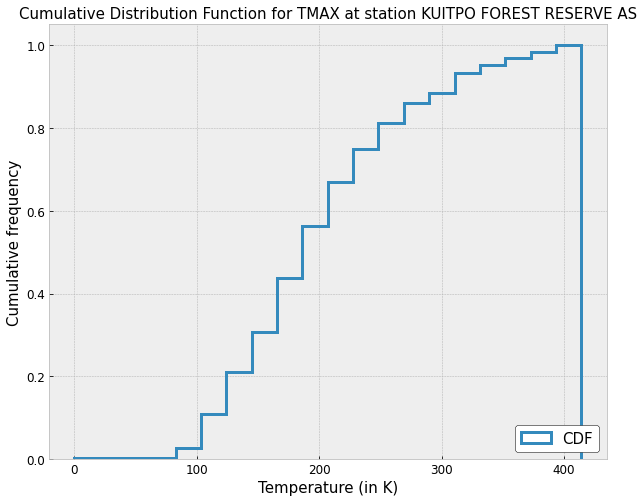

In [220]:
fig, ax = plt.subplots(figsize=[10,8])
fig = plt.hist(df_copy['TMAX'], bins = 20, alpha=1, cumulative=True,histtype='step', lw=3, density=True, label='CDF')
plt.title('Cumulative Distribution Function for TMAX at station {}'.format(station), fontsize=15, color='k')
plt.xlabel('Temperature (in K)', fontsize=15, color='k')
plt.ylabel('Cumulative frequency', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')
plt.legend(loc='lower right',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

# Cumulative Distribution Function for TMIN

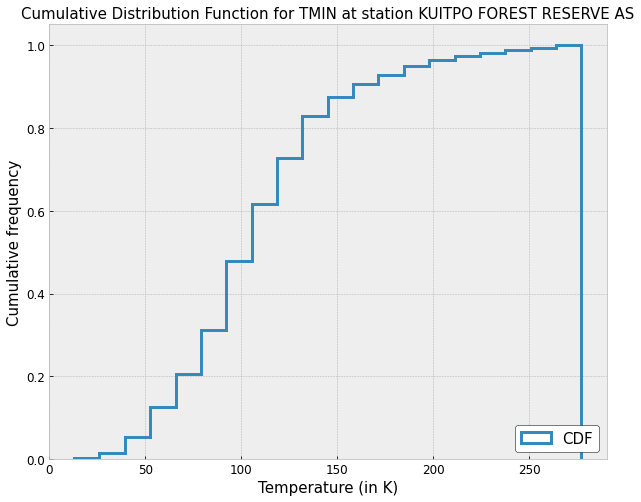

In [221]:
fig2, ax = plt.subplots(figsize=[10,8])
fig2 = plt.hist(df_copy['TMIN'], bins = 20, alpha=2, histtype='step', cumulative=1, lw=3, density=True, label='CDF')
plt.title('Cumulative Distribution Function for TMIN at station {}'.format(station), fontsize=15)
plt.xlabel('Temperature (in K)', fontsize=15)
plt.ylabel('Cumulative frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', facecolor='white',edgecolor='k', framealpha=1, fontsize=15)
plt.show()

# Pearson Correlation Coefficient and interpretation of R-squared

In [241]:
r = np.corrcoef(df_copy['TMAX'], df_copy['TMIN'])[0][1]
print('Pearson correlation coefficient:', r)
print('R-squared (coefficient of determination):', r**2)

Pearson correlation coefficient: 0.7455589638132833
R-squared (coefficient of determination): 0.5558581685223367


R-squared measures the goodness of the fit of a linear relationship to the given data points by informing on how much of variance of the dependent variable can the independent variable account for. In essence, it can quantify the degree of linear relationship between TMAX and TMIN. In this case, we have a significantly high value of R-squared corresponding to the number of data points, n = 427, which is a large enough sample size for this value of R-squared to be considered as a good fit for a linear relationship between TMIN and TMAX. However, this may or may not imply causality and other variables need to be looked into so as to determine that. 

# Scatter plot  : TMAX -> TMIN

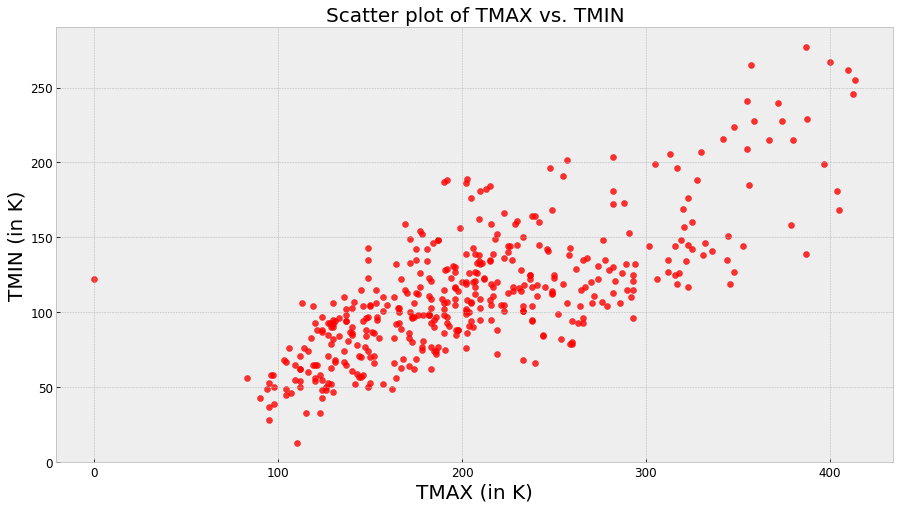

In [242]:
fig_scatter, ax = plt.subplots(figsize=[15,8]) 
plt.scatter(df_copy['TMAX'], df_copy['TMIN'], alpha=0.8, color='r')
plt.xlabel('TMAX (in K)', fontsize=20, color='k')
plt.ylabel('TMIN (in K)', fontsize=20, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.title('Scatter plot of TMAX vs. TMIN', color='k', fontsize=20)
plt.show()

# Scatterplot Smoothing without sorting
In the next cells, we will slice the data into slices of width _bins_ and calculate the average of the bins that we obtain. We will plot a line for those points along with the scatterplot in the same plot.

In [247]:
bins = 30 #number of intervals to slice the data into
unsorted_avgs_max = np.zeros(bins+1)
unsorted_avgs_min = np.zeros(bins+1)
j=0
len_df = len(df_copy)
bin_width = int(len_df/bins)
for i in range(0, len_df, bin_width ):
    df_copy['TMAX'][0]
    unsorted_avgs_max[j]=df_copy['TMAX'][i:i+bin_width].mean()
    unsorted_avgs_min[j]=df_copy['TMIN'][i:i+bin_width].mean()
    j=j+1


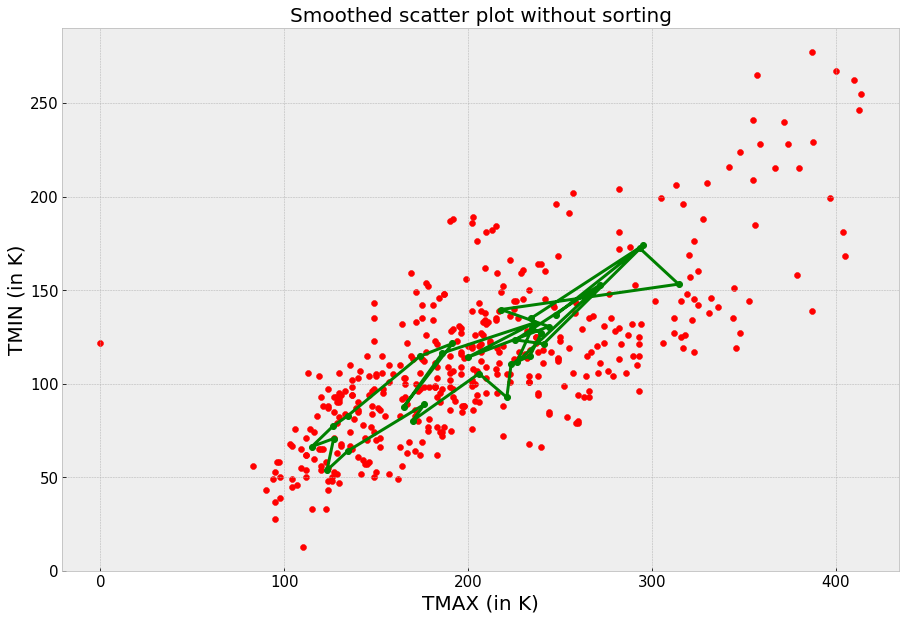

In [251]:
fig, ax = plt.subplots(figsize=[15,10])
plt.plot(unsorted_avgs_max,unsorted_avgs_min, 'g-o', alpha=1, lw=3)
plt.scatter(df_sorted_by_max['TMAX'], df_sorted_by_max['TMIN'], alpha=1, color='r')
plt.title("Smoothed scatter plot without sorting", color='k', fontsize=20)
plt.xlabel('TMAX (in K)',color='k', fontsize=20)
plt.ylabel('TMIN (in K)',color='k', fontsize=20)
plt.xticks(color='k', fontsize=15)
plt.yticks(color='k', fontsize=15)
plt.show()

# Scatterplot Smoothing with sorting
Now, we will sort the data by TMAX and then divide the data into slices of width _bin_ and then do the same as in the above section. 

In [254]:
df_grouped =pd.qcut(df_copy['TMAX'], q=bins) #slicing the data into intervals 
df_g = pd.DataFrame(df_grouped)
df_interval = df_copy.assign(Interval= df_g['TMAX'])  #storing dataframe with intervals
df_grouped = df_interval.groupby('Interval').agg('mean').drop('DATE', axis=1) #grouping dataframe by interval and aggregating by mean

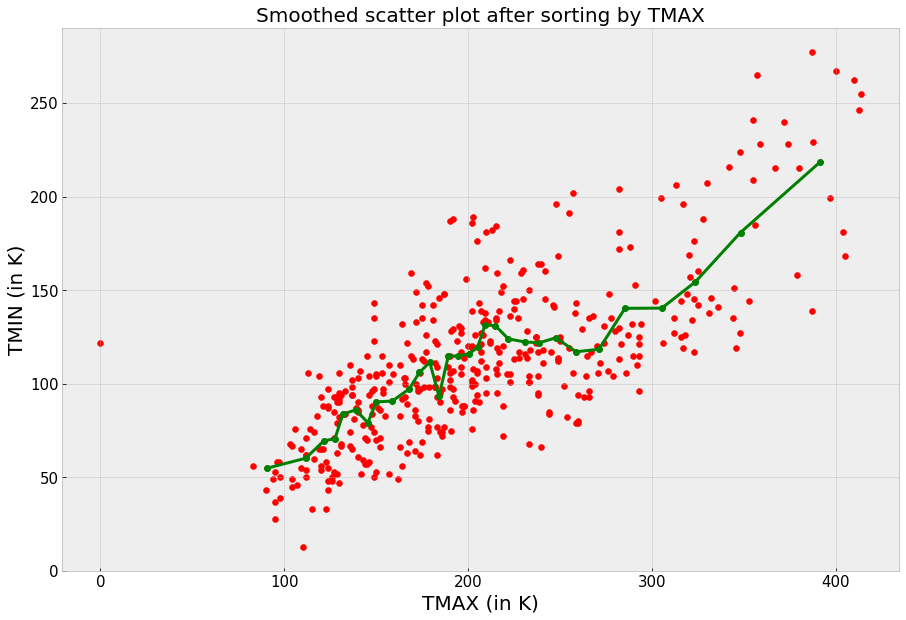

In [253]:
fig, ax = plt.subplots(figsize=[15,10])
plt.plot(df_grouped['TMAX'], df_grouped[('TMIN')], 'g-o', alpha=1, lw=3)
plt.scatter(df_sorted_by_max['TMAX'], df_sorted_by_max['TMIN'], alpha=1, color='r')
plt.title("Smoothed scatter plot after sorting by TMAX", color='k', fontsize=20)
plt.xlabel('TMAX (in K)',color='k', fontsize=20)
plt.ylabel('TMIN (in K)',color='k', fontsize=20)
plt.xticks(color='k', fontsize=15)
plt.yticks(color='k', fontsize=15)
plt.show()

Smoothed scatter plot can give us insights that a usual scatter plot may fail to give us. Smoothed scatter plots show us if the data points follow any trends. Earlier in this lab, we found the Pearson correlation coefficient for this set of TMIN and TMAX and saw that the R-squared value shows that there is a significant correlation between the two (given the number of data points ~ 400), suggesting a linear relationship between the two. Hence, plotting the smoothed scatter plot allows us to explore what potential relationships may exist between TMAX and TMIN. 